In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import csv
from pandas.tseries.offsets import MonthEnd
from datetime import datetime, timedelta, date
import requests
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels

from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


# 1998_2011 data MSFT

In [2]:
MSFT_98_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/MSFT/MSFT_98_train_flat_df_OHLC.csv", index_col=0)
MSFT_98_train = MSFT_98_train.reset_index(drop=True)


MSFT_98_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/MSFT/MSFT_98_test_flat_df_OHLC.csv", index_col=0)
MSFT_98_test = MSFT_98_test.reset_index(drop=True)


MSFT_02_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/MSFT/MSFT_02_train_flat_df_OHLC.csv", index_col=0)
MSFT_02_train = MSFT_02_train.reset_index(drop=True)


MSFT_02_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/MSFT/MSFT_02_test_flat_df_OHLC.csv", index_col=0)
MSFT_02_test = MSFT_02_test.reset_index(drop=True)


MSFT_06_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/MSFT/MSFT_06_train_flat_df_OHLC.csv", index_col=0)
MSFT_06_train = MSFT_06_train.reset_index(drop=True)


MSFT_06_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/MSFT/MSFT_06_test_flat_df_OHLC.csv", index_col=0)
MSFT_06_test = MSFT_06_test.reset_index(drop=True)

# 1998_2011 data AAPL

In [3]:
AAPL_98_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AAPL/AAPL_98_train_flat_df_OHLC.csv", index_col=0)
AAPL_98_train = AAPL_98_train.reset_index(drop=True)


AAPL_98_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AAPL/AAPL_98_test_flat_df_OHLC.csv", index_col=0)
AAPL_98_test = AAPL_98_test.reset_index(drop=True)


AAPL_02_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AAPL/AAPL_02_train_flat_df_OHLC.csv", index_col=0)
AAPL_02_train = AAPL_02_train.reset_index(drop=True)


AAPL_02_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AAPL/AAPL_02_test_flat_df_OHLC.csv", index_col=0)
AAPL_02_test = AAPL_02_test.reset_index(drop=True)


AAPL_06_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AAPL/AAPL_06_train_flat_df_OHLC.csv", index_col=0)
AAPL_06_train = AAPL_06_train.reset_index(drop=True)


AAPL_06_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AAPL/AAPL_06_test_flat_df_OHLC.csv", index_col=0)
AAPL_06_test = AAPL_06_test.reset_index(drop=True)



#  1998_2011 data AMZN

In [5]:
AMZN_98_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_98_train_flat_df_OHLC.csv", index_col=0)
AMZN_98_train = AMZN_98_train.reset_index(drop=True)


AMZN_98_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_98_test_flat_df_OHLC.csv", index_col=0)
AMZN_98_test = AMZN_98_test.reset_index(drop=True)


AMZN_02_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_02_train_flat_df_OHLC.csv", index_col=0)
AMZN_02_train = AMZN_02_train.reset_index(drop=True)


AMZN_02_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_02_test_flat_df_OHLC.csv", index_col=0)
AMZN_02_test = AMZN_02_test.reset_index(drop=True)


AMZN_06_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_06_train_flat_df_OHLC.csv", index_col=0)
AMZN_06_train = AMZN_06_train.reset_index(drop=True)


AMZN_06_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_06_test_flat_df_OHLC.csv", index_col=0)
AMZN_06_test = AMZN_06_test.reset_index(drop=True)



In [6]:
X_train= pd.concat([MSFT_98_train,MSFT_98_test,MSFT_02_train,MSFT_02_test,MSFT_06_train,MSFT_06_test,
               AAPL_98_train,AAPL_98_test,AAPL_02_train,AAPL_02_test,AAPL_06_train,AAPL_06_test,
                AMZN_98_train,AMZN_98_test,AMZN_02_train,AMZN_02_test,AMZN_06_train,AMZN_06_test])



In [7]:
#assign the training labels to y_train
y_train = X_train.Label
y_train_df = pd.DataFrame(y_train)
#drop the labels from the X_train dataframe
X_train = X_train.drop("Label", axis=1)

export_X_train = X_train.to_csv("/Users/fahad/project_repo/data/final/OHLC/X_train_OHLC.csv")
export_y_train = y_train_df.to_csv("/Users/fahad/project_repo/data/final/OHLC/y_train_OHLC.csv")

In [8]:
def make_timeseries_classifier(sample_num,window_size, filter_length, nb_input_series=1, nb_outputs=1, nb_filter=16):
    """:Return: a Keras Model for predicting the next value in a timeseries given a fixed-size lookback window of previous values.
    The model can handle multiple input timeseries (`nb_input_series`) and multiple prediction targets (`nb_outputs`).
    :param int window_size: The number of previous timeseries values to use as input features.  Also called lag or lookback.
    :param int nb_input_series: The number of input timeseries; 1 for a single timeseries.
      The `X` input to ``fit()`` should be an array of shape ``(n_instances, window_size, nb_input_series)``; each instance is
      a 2D array of shape ``(window_size, nb_input_series)``.  For example, for `window_size` = 3 and `nb_input_series` = 1 (a
      single timeseries), one instance could be ``[[0], [1], [2]]``. See ``make_timeseries_instances()``.
    :param int nb_outputs: The output dimension, often equal to the number of inputs.
      For each input instance (array with shape ``(window_size, nb_input_series)``), the output is a vector of size `nb_outputs`,
      usually the value(s) predicted to come after the last value in that input instance, i.e., the next value
      in the sequence. The `y` input to ``fit()`` should be an array of shape ``(n_instances, nb_outputs)``.
    :param int filter_length: the size (along the `window_size` dimension) of the sliding window that gets convolved with
      each position along each instance. The difference between 1D and 2D convolution is that a 1D filter's "height" is fixed
      to the number of input timeseries (its "width" being `filter_length`), and it can only slide along the window
      dimension.  This is useful as generally the input timeseries have no spatial/ordinal relationship, so it's not
      meaningful to look for patterns that are invariant with respect to subsets of the timeseries.
    :param int nb_filter: The number of different filters to learn (roughly, input patterns to recognize).
    """
    model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size,nb_input_series)),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(nb_outputs, activation='sigmoid'),     # For binary classification, change the activation to 'sigmoid'
    ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # To perform (binary) classification instead:
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    
    return model

In [9]:
model_1 = make_timeseries_classifier(X_train.shape[0],X_train.shape[1],3)

/Users/fahad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(150, 1), filters=16, kernel_size=3)`
W0818 11:16:22.172845 4425348544 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/fahad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=16, kernel_size=3)`
W0818 11:16:22.268724 4425348544 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 11:16:22.342487 4425348544 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python

In [10]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 148, 16)           64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 74, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 72, 16)            784       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 36, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 577       
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [11]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=0, patience=150)
mc = ModelCheckpoint('1D_CNN_FE_98_11_model_OHLC.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
cb_list = [es,mc]

In [13]:
X_train = np.array(X_train).reshape(*X_train.shape,1)

(609, 150, 1)

In [15]:
history=model_1.fit(X_train, y_train,validation_split=0.10, epochs=1000,batch_size=1, verbose=1,
                    callbacks = cb_list)

W0818 11:18:05.248803 4425348544 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 548 samples, validate on 61 samples
Epoch 1/1000
548/548 [==============================] - 1s 2ms/step - loss: 0.6935 - acc: 0.5639 - val_loss: 0.6566 - val_acc: 0.6885

Epoch 00001: val_acc improved from -inf to 0.68852, saving model to 1D_CNN_FE_98_11_model_OHLC.h5
Epoch 2/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.6860 - acc: 0.5620 - val_loss: 0.6533 - val_acc: 0.6885

Epoch 00002: val_acc did not improve from 0.68852
Epoch 3/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.6851 - acc: 0.5730 - val_loss: 0.6475 - val_acc: 0.6885

Epoch 00003: val_acc did not improve from 0.68852
Epoch 4/1000
548/548 [==============================] - 1s 2ms/step - loss: 0.6807 - acc: 0.5858 - val_loss: 0.6414 - val_acc: 0.6885

Epoch 00004: val_acc did not improve from 0.68852
Epoch 5/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.6750 - acc: 0.5858 - val_loss: 0.6428 - val_acc: 0.7377

Epoch 00005: val_acc improved fr

548/548 [==============================] - 1s 1ms/step - loss: 0.5688 - acc: 0.6807 - val_loss: 0.5969 - val_acc: 0.6885

Epoch 00044: val_acc did not improve from 0.77049
Epoch 45/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.5660 - acc: 0.6752 - val_loss: 0.5965 - val_acc: 0.6721

Epoch 00045: val_acc did not improve from 0.77049
Epoch 46/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.5609 - acc: 0.6880 - val_loss: 0.5990 - val_acc: 0.6721

Epoch 00046: val_acc did not improve from 0.77049
Epoch 47/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.5639 - acc: 0.6807 - val_loss: 0.5960 - val_acc: 0.6885

Epoch 00047: val_acc did not improve from 0.77049
Epoch 48/1000
548/548 [==============================] - 1s 2ms/step - loss: 0.5578 - acc: 0.6788 - val_loss: 0.5911 - val_acc: 0.6885

Epoch 00048: val_acc did not improve from 0.77049
Epoch 49/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.5563 

548/548 [==============================] - 1s 1ms/step - loss: 0.4196 - acc: 0.8120 - val_loss: 0.6954 - val_acc: 0.6885

Epoch 00088: val_acc did not improve from 0.77049
Epoch 89/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.4193 - acc: 0.8047 - val_loss: 0.6789 - val_acc: 0.7049

Epoch 00089: val_acc did not improve from 0.77049
Epoch 90/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.4061 - acc: 0.8139 - val_loss: 0.6807 - val_acc: 0.7049

Epoch 00090: val_acc did not improve from 0.77049
Epoch 91/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.4184 - acc: 0.8047 - val_loss: 0.7065 - val_acc: 0.7049

Epoch 00091: val_acc did not improve from 0.77049
Epoch 92/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.4028 - acc: 0.8303 - val_loss: 0.6841 - val_acc: 0.7049

Epoch 00092: val_acc did not improve from 0.77049
Epoch 93/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.3990 

548/548 [==============================] - 1s 1ms/step - loss: 0.3186 - acc: 0.8686 - val_loss: 0.8987 - val_acc: 0.7049

Epoch 00132: val_acc did not improve from 0.77049
Epoch 133/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.3021 - acc: 0.8704 - val_loss: 0.9033 - val_acc: 0.6885

Epoch 00133: val_acc did not improve from 0.77049
Epoch 134/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.3096 - acc: 0.8723 - val_loss: 0.9385 - val_acc: 0.7049

Epoch 00134: val_acc did not improve from 0.77049
Epoch 135/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.2967 - acc: 0.8723 - val_loss: 0.9304 - val_acc: 0.7049

Epoch 00135: val_acc did not improve from 0.77049
Epoch 136/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.3005 - acc: 0.8759 - val_loss: 0.9543 - val_acc: 0.7049

Epoch 00136: val_acc did not improve from 0.77049
Epoch 137/1000
548/548 [==============================] - 1s 1ms/step - loss: 0.

W0818 11:20:17.999308 4425348544 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


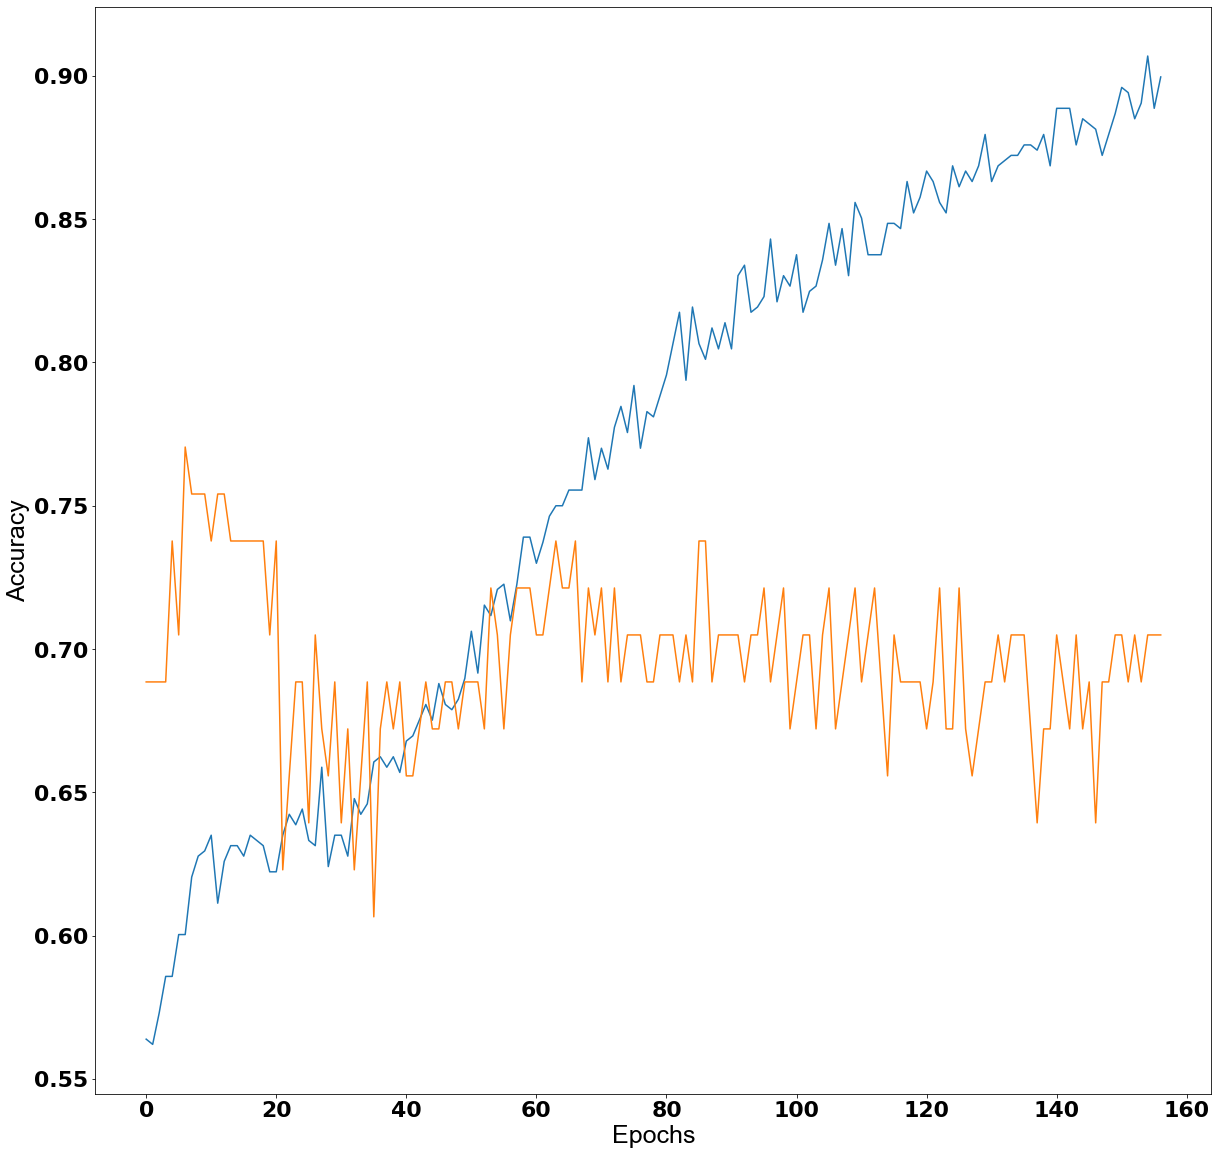

In [16]:
#plot the accuracy of the training set  and the validation set of the model
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
axis_font = {'fontname':'Arial', 'size':'25'}

plt.figure(figsize=[20,20])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy', **axis_font)
plt.xlabel('Epochs', **axis_font)

plt.show()